# Solutions 2 - Examples in Eigenvalue Decomposition
---

## Assignment 1


In [1]:
# Pkg.add("MatrixMarket")
using MatrixMarket

In [2]:
whos(MatrixMarket)

                  MatrixMarket     23 KB     Module
                        mmread   7200 bytes  Function


In [3]:
#############################################################
# Download and parse every file from the NIST Matrix Market #
#############################################################

#Convenience function to emulate the behavior of gunzip
using GZip
function gunzip(fname)
    destname, ext = splitext(fname)
    if ext != ".gz"
        error("gunzip: $fname: unknown suffix -- ignored")
    end
    open(destname, "w") do f
        GZip.open(fname) do g
            write(f, readall(g))
        end
    end
    destname
end

#Download and parse master list of matrices
if !isfile("matrices.html")
    download("http://math.nist.gov/MatrixMarket/matrices.html", "matrices.html")
end

matrixmarketdata = Any[]
open("matrices.html") do f
   for line in readlines(f)
       if contains(line, """<A HREF="/MatrixMarket/data/""")
           collectionname, setname, matrixname = split(split(line, '"')[2], '/')[4:6]
           matrixname = split(matrixname, '.')[1]
           push!(matrixmarketdata, (collectionname, setname, matrixname) )
       end
   end
end

#Download one matrix at random
n = rand(1:length(matrixmarketdata))
for (collectionname, setname, matrixname) in matrixmarketdata[n:n]
    fn = string(collectionname, '_', setname, '_', matrixname)
    mtxfname = string(fn, ".mtx")
    if !isfile(mtxfname)
        url = "ftp://math.nist.gov/pub/MatrixMarket2/$collectionname/$setname/$matrixname.mtx.gz"
        gzfname = string(fn, ".mtx.gz")
        try
            download(url, gzfname)
        catch
            continue
        end
        gunzip(gzfname)
    end
end

In [4]:
readdir()

21-element Array{ByteString,1}:
 ".ipynb_checkpoints"                                                                     
 "Harwell-Boeing_bcsstruc1_bcsstk11.mtx"                                                  
 "Harwell-Boeing_bcsstruc1_bcsstk11.mtx.gz"                                               
 "Harwell-Boeing_smtape_fs_541_1.mtx"                                                     
 "Harwell-Boeing_smtape_fs_541_1.mtx.gz"                                                  
 "L3a Eigenvalue Decomposition - Definitions and Facts.ipynb"                             
 "L3b Eigenvalue Decomposition - Perturbation Theory.ipynb"                               
 "L4a Symmetric Eigenvalue Decomposition - Algorithms and Error Analysis.ipynb"           
 "L4b Symmetric Eigenvalue Decomposition - Algorithms for Tridiagonal Matrices.ipynb"     
 "L4c Symmetric Eigenvalue Decomposition - Jacobi Method and High Relative Accuracy.ipynb"
 "L4d Symmetric Eigenvalue Decomposition - Lanczos Method.

In [6]:
A=mmread("Harwell-Boeing_bcsstruc1_bcsstk11.mtx")

1473x1473 sparse matrix with 34241 Float64 entries:
	[1   ,    1]  =  1.01185e6
	[2   ,    1]  =  4.11009e6
	[3   ,    1]  =  -4.47035e-8
	[4   ,    1]  =  -3.11976e5
	[5   ,    1]  =  -1.18472e6
	[6   ,    1]  =  9.31323e-9
	[52  ,    1]  =  22135.0
	[53  ,    1]  =  90321.0
	[54  ,    1]  =  -18909.1
	[55  ,    1]  =  -1.4405e5
	⋮
	[1415, 1473]  =  -1.36083e6
	[1416, 1473]  =  -2.28427e6
	[1420, 1473]  =  18909.1
	[1421, 1473]  =  4631.25
	[1422, 1473]  =  -5.29354e6
	[1465, 1473]  =  -1.02445e-8
	[1466, 1473]  =  3.35276e-8
	[1467, 1473]  =  7.58227e5
	[1471, 1473]  =  6.33299e-8
	[1472, 1473]  =  -2.6077e-7
	[1473, 1473]  =  1.82401e7

In [7]:
size(A)

(1473,1473)

In [8]:
issym(A)

true

In [9]:
cond(full(A))

2.2118529808121562e8

In [10]:
using Gadfly

In [11]:
?spy

search: 

```
spy(M::AbstractMatrix, elements::ElementOrFunction...; mapping...)
```

Simple heatmap plots of matrices.

It is a wrapper around the `plot()` function using the `rectbin` geometry. It also applies a sane set of defaults to make sure that the plots look nice by default. Specifically - the aspect ratio of the coordinate system is fixed Coord.cartesian(fixed=true), so that the rectangles become squares - the axes run from 0.5 to N+0.5, because the first row/column is drawn to (0.5, 1.5) and the last one to (N-0.5, N+0.5). - the y-direction is flipped, so that the [1,1] of a matrix is in the top left corner, as is customary - NaNs are not drawn. `spy` leaves "holes" instead into the heatmap.

### Args:

  * M: A matrix.

### Returns:

A plot object.

#### Known bugs:

  * If the matrix is only NaNs, then it throws an `ArgumentError`, because      an empty collection gets passed to the `plot` function / `rectbin` geometry.


spy speye Display display displayable undisplay redisplay popdisplay



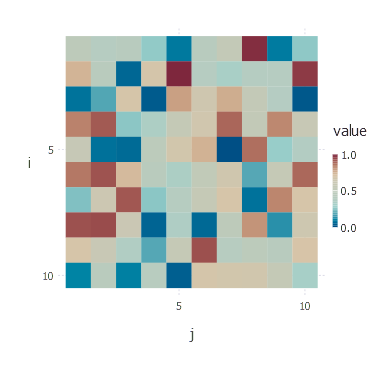

In [12]:
# Plot of a small random matrix, for illustration
B=rand(10,10)
myplot=spy(B)
draw(PNG(10cm,10cm),myplot)

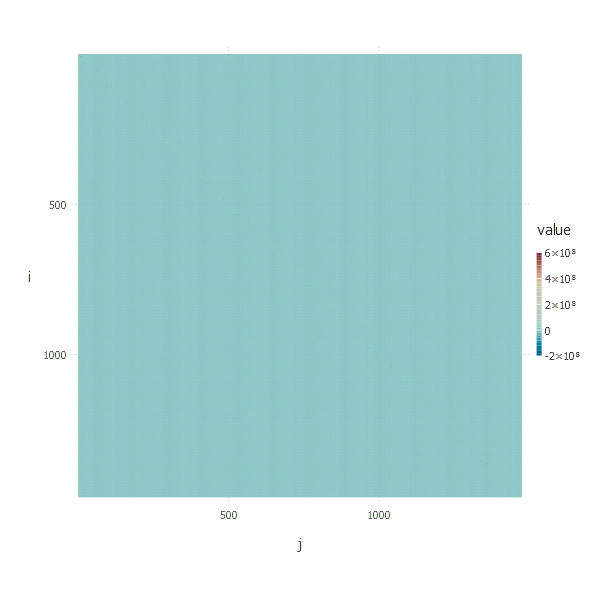

In [13]:
# Now our matrix - Wait!
myPlot=spy(A)
draw(PNG(16cm,16cm),myPlot)

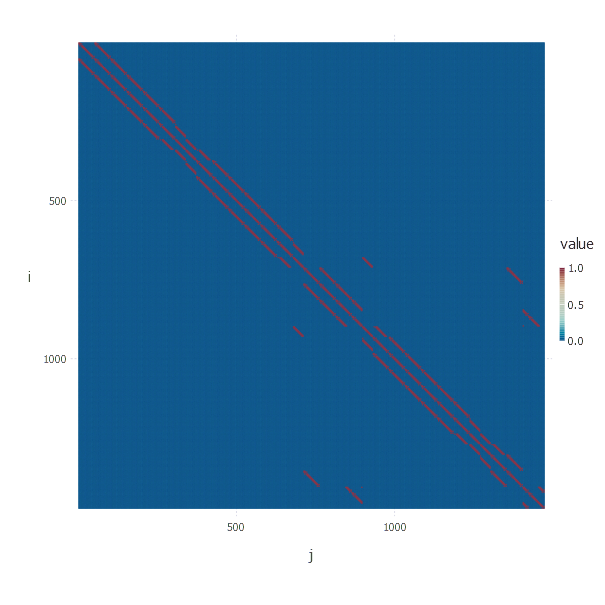

In [14]:
# To see the structure:
myPlot=spy(map(Int64,A.!=0.0))
draw(PNG(16cm,16cm),myPlot)

## Assignment 2

In [15]:
using MatrixDepot

In [16]:
whos(MatrixDepot)

                     @addgroup    282 bytes  Function
                      @rmgroup    281 bytes  Function
                   MatrixDepot    577 KB     Module
                   matrixdepot     16 KB     Function


In [17]:
matrixdepot()


Matrices:
   1) baart            2) binomial         3) blur             4) cauchy        
   5) chebspec         6) chow             7) circul           8) clement       
   9) companion       10) deriv2          11) dingdong        12) fiedler       
  13) forsythe        14) foxgood         15) frank           16) golub         
  17) gravity         18) grcar           19) hadamard        20) hankel        
  21) heat            22) hilb            23) invhilb         24) invol         
  25) kahan           26) kms             27) lehmer          28) lotkin        
  29) magic           30) minij           31) moler           32) neumann       
  33) oscillate       34) parallax        35) parter          36) pascal        
  37) pei             38) phillips        39) poisson         40) prolate       
  41) randcorr        42) rando           43) randsvd         44) rohess        
  45) rosser          46) sampling        47) shaw            48) spikes        
  49) toeplitz   

In [18]:
matrixdepot("eigen")

23-element Array{ASCIIString,1}:
 "chebspec" 
 "chow"     
 "circul"   
 "clement"  
 "dingdong" 
 "fiedler"  
 "forsythe" 
 "frank"    
 "grcar"    
 "hadamard" 
 "invol"    
 "lotkin"   
 "minij"    
 "neumann"  
 "oscillate"
 "parter"   
 "pascal"   
 "poisson"  
 "rosser"   
 "sampling" 
 "tridiag"  
 "wathen"   
 "wilkinson"

In [19]:
matrixdepot("sparse","symmetric")

2-element Array{ASCIIString,1}:
 "poisson"
 "wathen" 

In [20]:
matrixdepot("wathen")

# Wathen Matrix

Wathen Matrix is a sparse, symmetric positive, random matrix  arose from the finite element method. The generated matrix is  the consistent mass matrix for a regular nx-by-ny grid of  8-nodes.

*Input options:*

  * [type,] nx, ny: the dimension of the matrix is equal to     `3 * nx * ny + 2 * nx * ny + 1`.

  * [type,] n: `nx = ny = n`.

*Groups:* ["symmetric", "pos-def", "eigen", "random", "sparse"]

*References:* 

**A. J. Wathen**, Realistic eigenvalue bounds for     the Galerkin mass matrix, IMA J. Numer. Anal., 7 (1987),     pp. 449-457.


In [21]:
matrixdepot("ill-cond","symmetric")

10-element Array{ASCIIString,1}:
 "cauchy"   
 "hilb"     
 "invhilb"  
 "kms"      
 "moler"    
 "oscillate"
 "pascal"   
 "pei"      
 "prolate"  
 "tridiag"  

## Assignment 3

Some programs:

* https://github.com/purzelrakete/Pagerank.jl

* https://gist.github.com/domluna/2b9358ccc89fee7d5e26

You can also try function `eigs()` or the Power method.
